In [30]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data')
X = df.to_numpy()
print(df.head())


   length   height   width
0     8.4     2.11    1.41
1    13.7     3.53    2.00
2    15.0     3.82    2.43
3    16.2     4.59    2.63
4    17.4     4.59    2.94


In [31]:
y = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
                         115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                         150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
                         218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
                         556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
                         850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
                         1000.0])


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5,include_bias=False)
poly.fit(X_train) # fit is required to transform
X_poly = poly.transform(X_train)

X_poly

array([[1.96000000e+01, 5.14000000e+00, 3.04000000e+00, ...,
        7.42244501e+02, 4.38992857e+02, 2.59637799e+02],
       [2.20000000e+01, 5.88000000e+00, 3.52000000e+00, ...,
        1.50793507e+03, 9.02709432e+02, 5.40397483e+02],
       [1.87000000e+01, 5.20000000e+00, 3.12000000e+00, ...,
        8.21240709e+02, 4.92744425e+02, 2.95646655e+02],
       ...,
       [2.56000000e+01, 6.56000000e+00, 4.24000000e+00, ...,
        3.28023719e+03, 2.12015331e+03, 1.37034299e+03],
       [4.20000000e+01, 1.28000000e+01, 6.87000000e+00, ...,
        5.31239245e+04, 2.85126063e+04, 1.53032504e+04],
       [3.45000000e+01, 1.02600000e+01, 6.39000000e+00, ...,
        2.74661189e+04, 1.71060916e+04, 1.06537939e+04]])

In [34]:
poly.get_feature_names_out() # Show how the new features are created

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

In [35]:
test_poly = poly.transform(X_test)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr = lr.fit(X_poly,y_train)

print(lr.score(X_poly,y_train)) # Score for Training set

0.999999999999769


In [36]:
print(lr.score(test_poly,y_test))

-144.40490595353674


In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_poly)

scaled_X = sc.transform(X_poly)
scaled_y = sc.transform(test_poly)

In [38]:
# Ridge Regression
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(scaled_X,y_train)

print(ridge.score(scaled_X,y_train)) # For training set 


0.9896101671037343


In [39]:
import matplotlib.pyplot as plt
print(ridge.score(scaled_y,y_test))

0.9790693977615388


Text(0, 0.5, 'R^2')

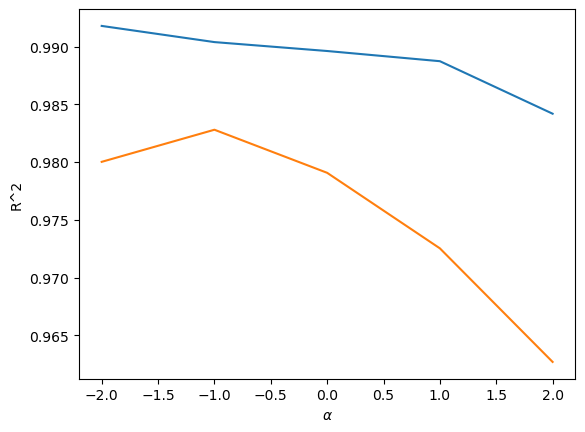

In [40]:
train_score = []
test_score = []

alpha_list = [0.01, 0.01, 0.1,1,10, 100]
for i in alpha_list:
    ridge = Ridge(alpha=i)
    ridge.fit(scaled_X,y_train)
    train_score.append(ridge.score(scaled_X,y_train))
    test_score.append(ridge.score(scaled_y,y_test))
    
    
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

plt.xlabel(r'$\alpha$')
plt.ylabel('R^2')

In [41]:
ridge = Ridge(alpha=0.1)
ridge.fit(scaled_X,y_train)

print(ridge.score(scaled_X,y_train))
print(ridge.score(scaled_y,y_test))

0.9903815817570366
0.9827976465386955


In [42]:
# Lasso
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(scaled_X,y_train)
print(lasso.score(scaled_X,y_train))
print("Lasso:", lasso.score(scaled_y,y_test))


0.989789897208096
Lasso: 0.9800593698421884


In [44]:
# FIND Best parameter for Lasso
train_score = []
test_score = []

alpha_list = [0.01, 0.01, 0.1,1,10, 100]

for i in alpha_list:
    lasso = Lasso(alpha=i,max_iter=1000000)
    lasso.fit(scaled_X,y_train)
    
    train_score.append(lasso.score(scaled_X,y_train))
    test_score.append(lasso.score(scaled_y,y_test))


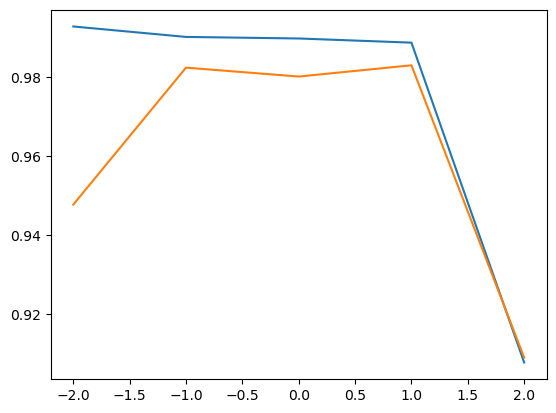

In [45]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)


In [48]:
lasso = Lasso(alpha=1)
lasso.fit(scaled_X,y_train)
print(lasso.score(scaled_X,y_train))
print(lasso.score(scaled_y,y_test))

print(np.sum(lasso.coef_ == 0))

0.989789897208096
0.9800593698421884
42
